In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [2]:
## load data set
data = pd.read_csv('penguins.csv')
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Understand the given data 

In [4]:
data.shape

(344, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
data.describe() ##statistical data

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowid,344.0,172.500000,99.448479,1.0,86.750,172.50,258.25,344.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


In [9]:
data.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [15]:
data.describe(include='all')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [7]:
data.nunique()  ##unique values

rowid                344
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

## Find null values

In [12]:
data.isnull()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False,False


In [13]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [26]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

In [29]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [70]:
data.drop(columns=['rowid'], inplace=True)

In [82]:
##correlation
data.corr()

ValueError: could not convert string to float: 'Adelie'

In [84]:
## heat map
sns.heatmap(data.corr(), cmap= 'Wistia', annot=True)

ValueError: could not convert string to float: 'Adelie'

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

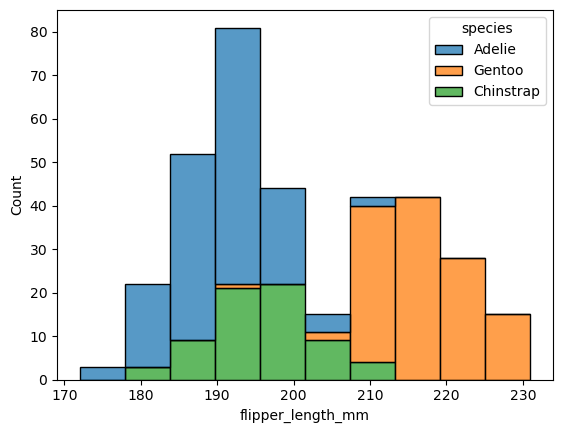

In [86]:
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:
## visualizations

In [77]:
sns.__version__

'0.12.2'

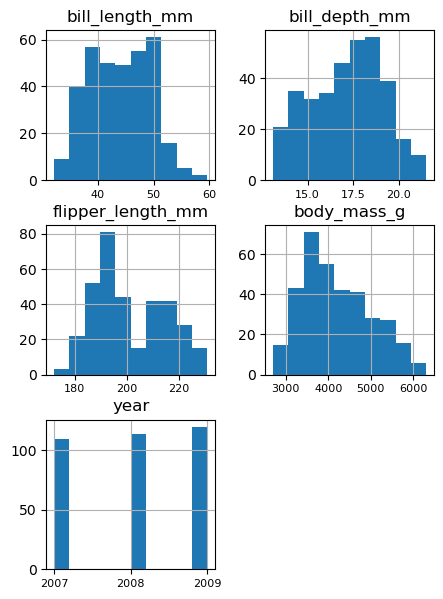

In [73]:
data_numeric = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
# all distributed
data_numeric.hist(figsize=(5,7), xlabelsize = 8);

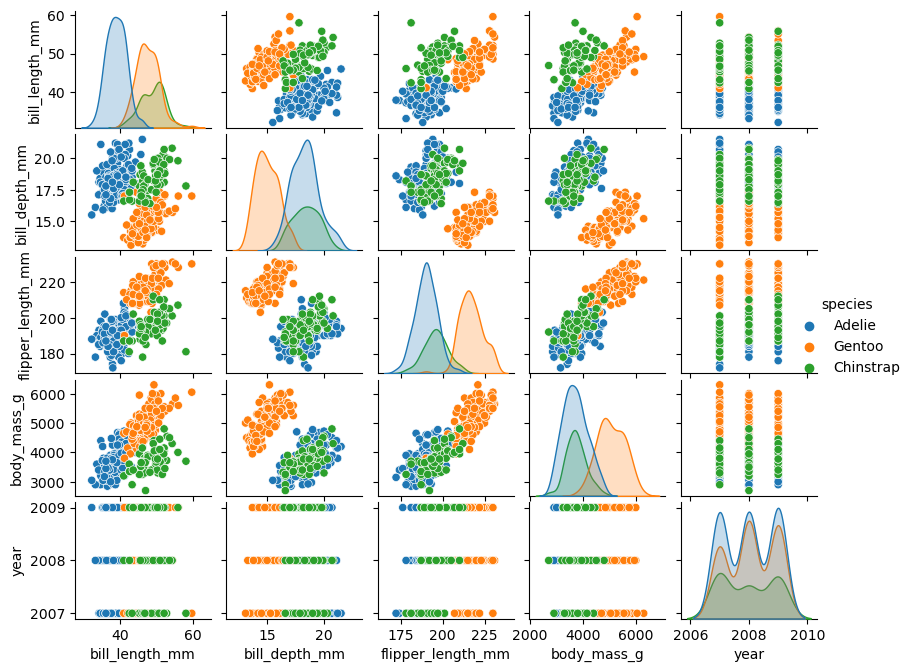

In [74]:
import seaborn as sns

pairplot_figure = sns.pairplot(data, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

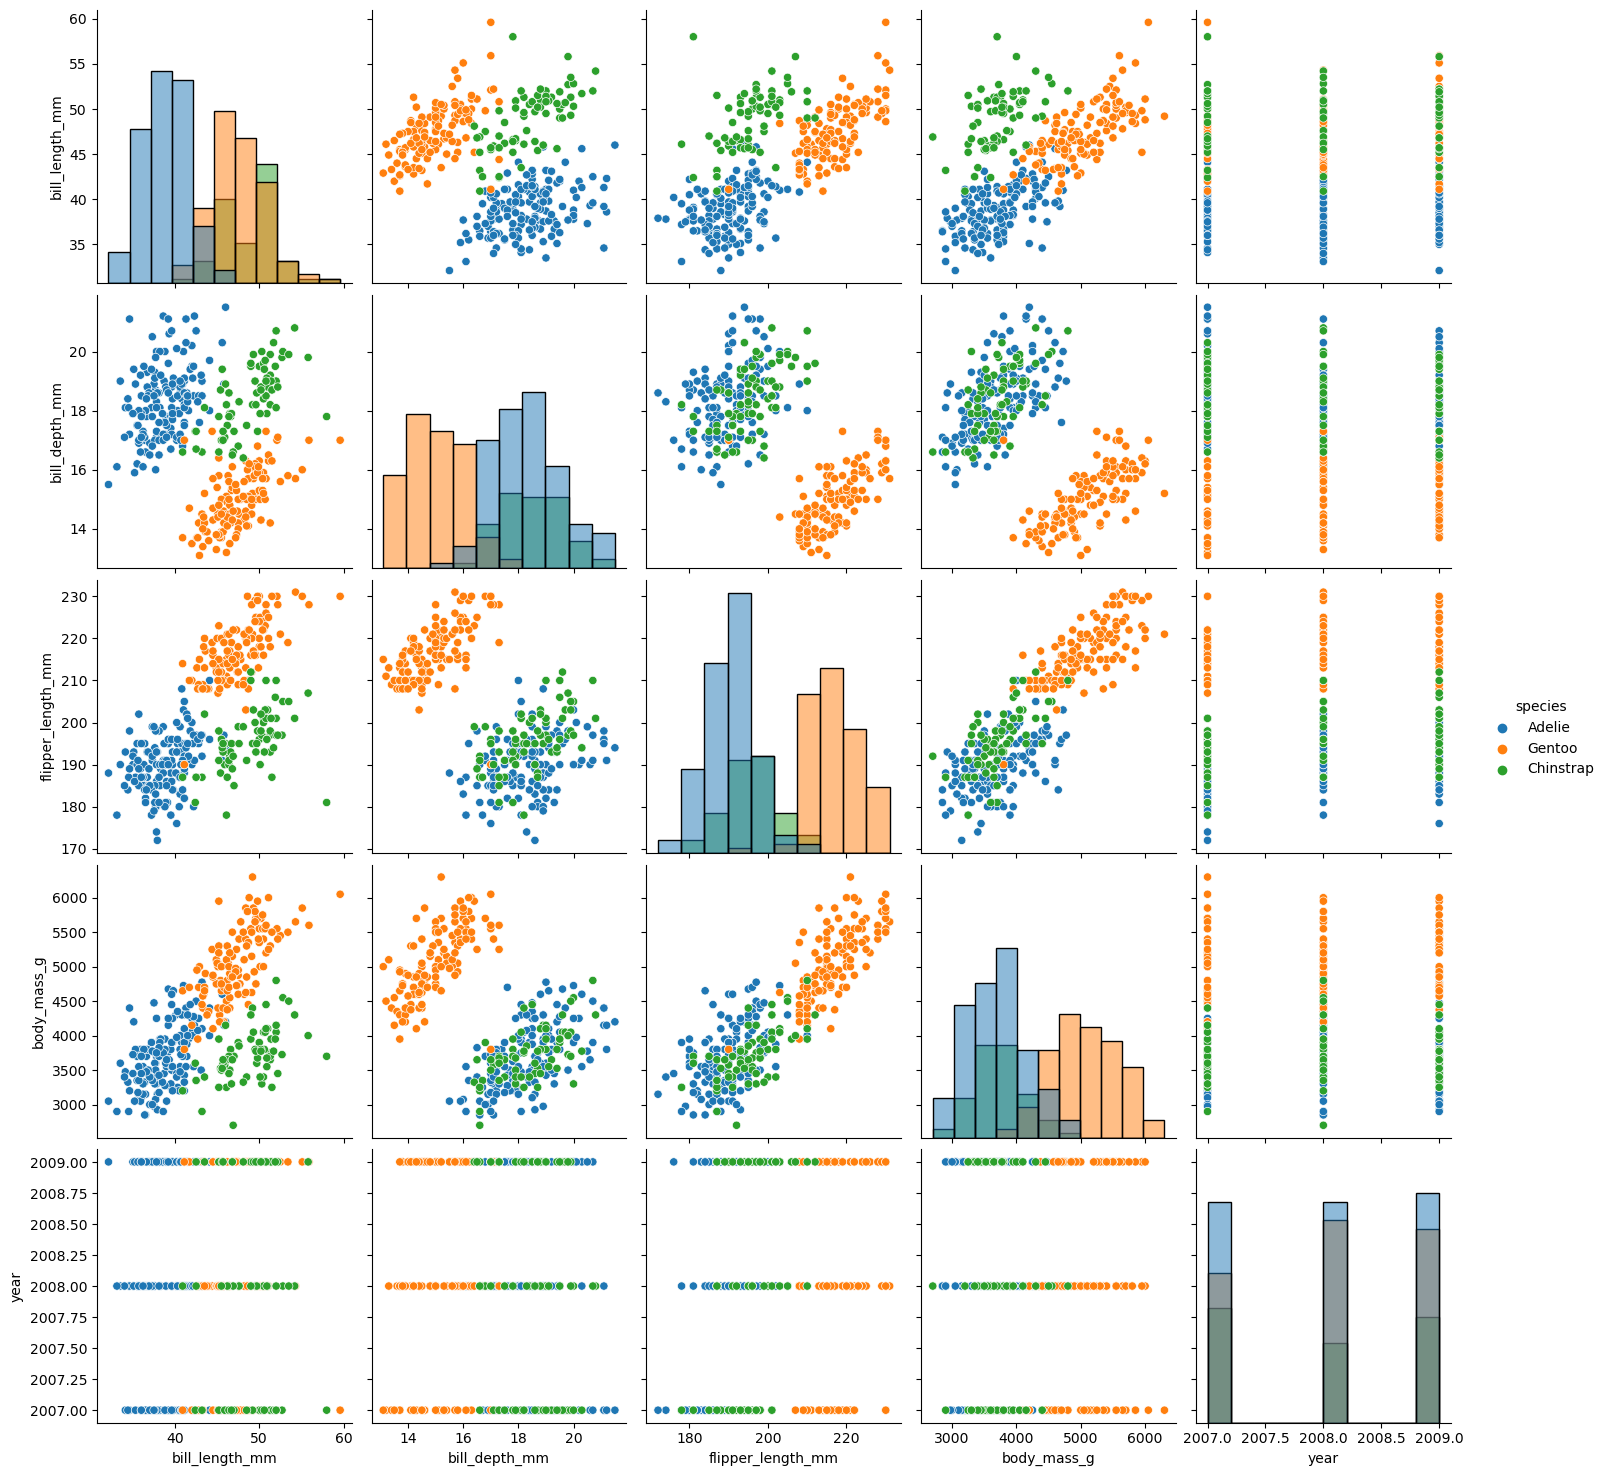

In [75]:
sns.pairplot(data, hue="species", size=3,diag_kind="hist")

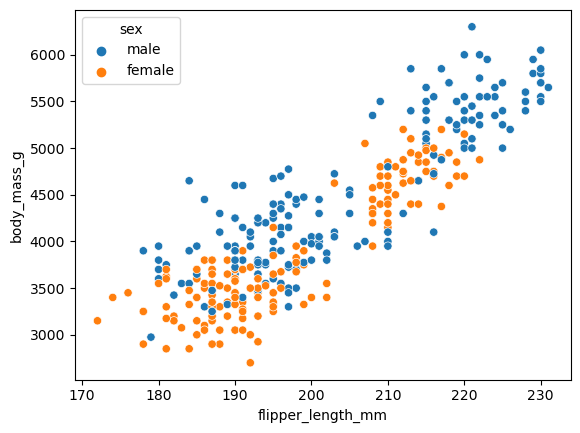

In [76]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

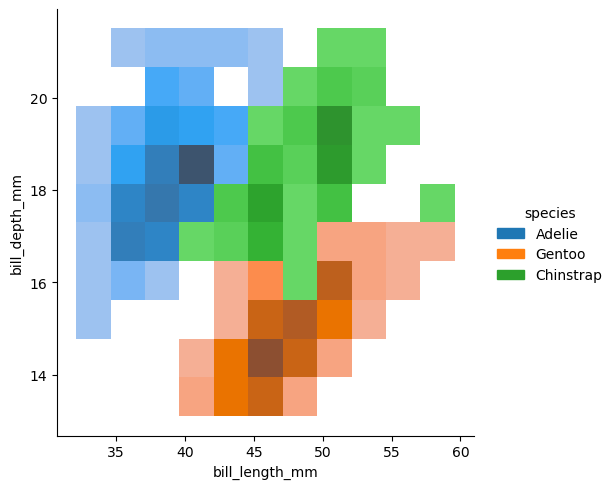

In [89]:
sns.displot(data, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [44]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [47]:
fig =px.bar( data_frame=data, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},

width=700,height=500 )

fig.show()

In [51]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=400,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()